<a href="https://colab.research.google.com/github/linalex13666/Labs/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [50]:
import pandas as pd
df = pd.read_csv("/content/c_0100.csv")# чтение файла
df

,x,y,z,vx,vy,vz,m,id
0,-0.043497,0.105297,0.138277,-0.212943,-0.404257,-0.605191,0.000016,8427
1,-0.040714,0.108759,0.136523,0.204248,0.109212,-0.873800,0.000016,44328
2,-0.498487,-1.699947,0.132564,0.262516,-0.324764,0.562522,0.000016,4
3,-0.180061,0.772876,-0.091783,0.031714,0.423959,0.106319,0.000016,38907
4,0.011865,0.426583,0.485580,0.005719,-0.581521,-0.088140,0.000016,6
...,...,...,...,...,...,...,...,...
63992,1.058976,1.956077,-0.386337,-0.118746,-0.553942,-0.208733,0.000016,63996
63993,0.753311,0.004259,0.111236,-0.794958,-0.153329,0.131538,0.000016,63997
63994,0.064444,-0.159256,-0.620617,0.244356,-0.082614,-0.113567,0.000016,63998
63995,0.180758,1.093747,0.601112,-0.379059,-0.388060,0.007006,0.000016,63999


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [ ]:
# your_code here

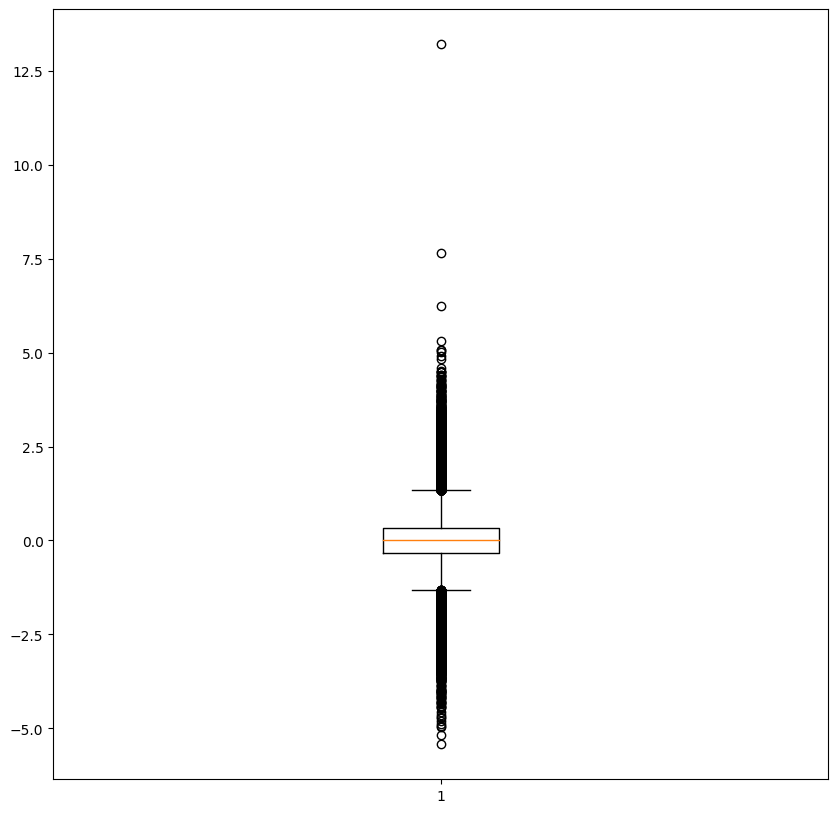

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.boxplot(df['x'])

plt.show()

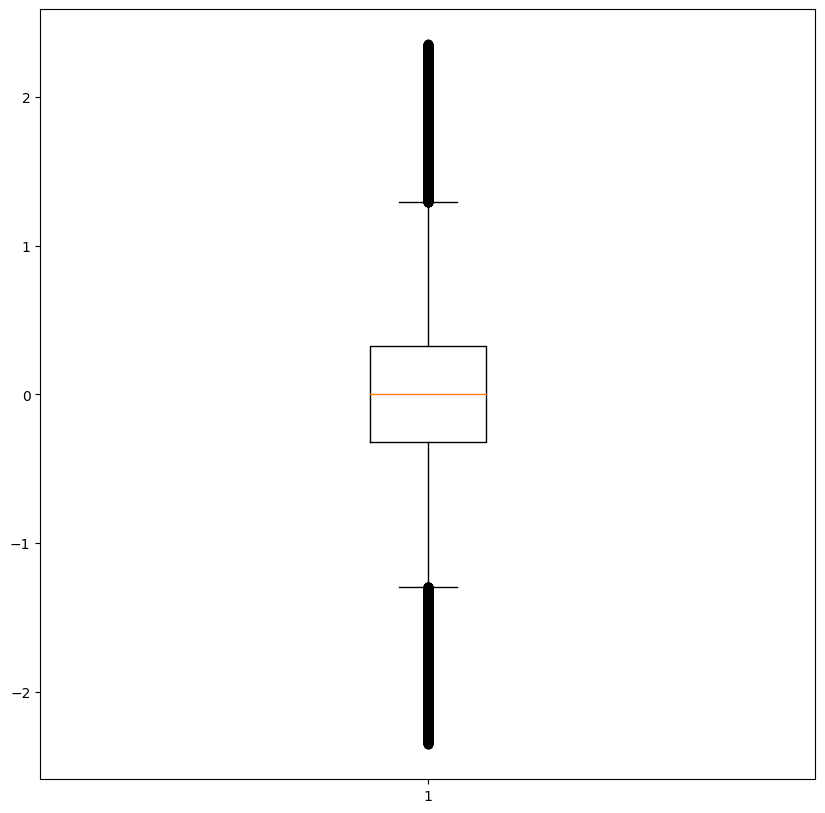

In [54]:
import numpy as np
mean = df["x"].mean()
std_deviation = df["x"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["x"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.x.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['x'])

plt.show()

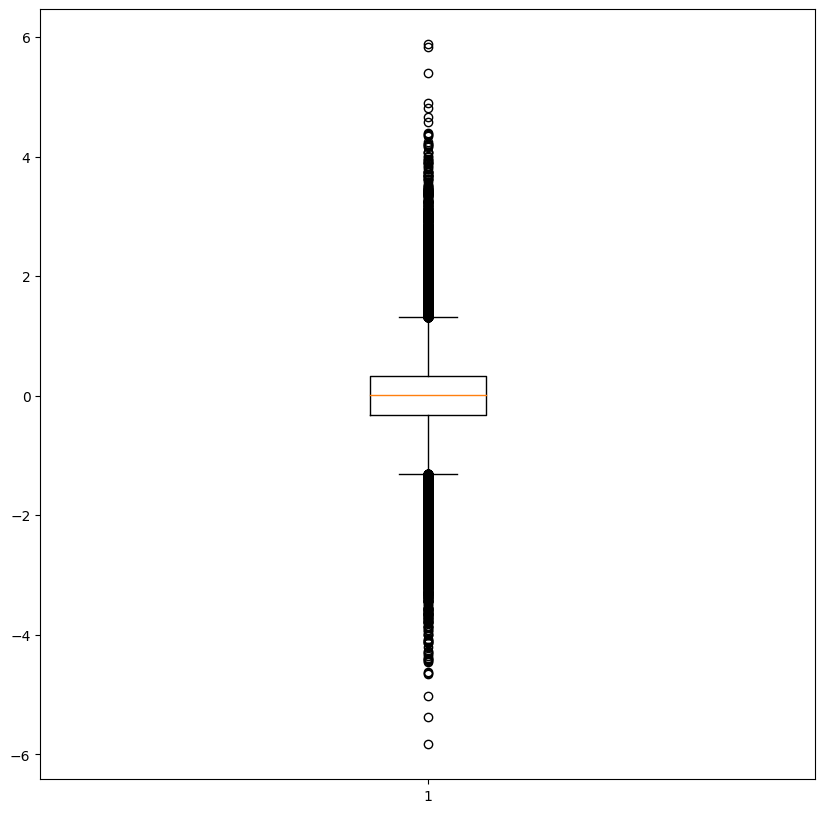

In [30]:
plt.figure(figsize=(10, 10))
plt.boxplot(df['y'])

plt.show()

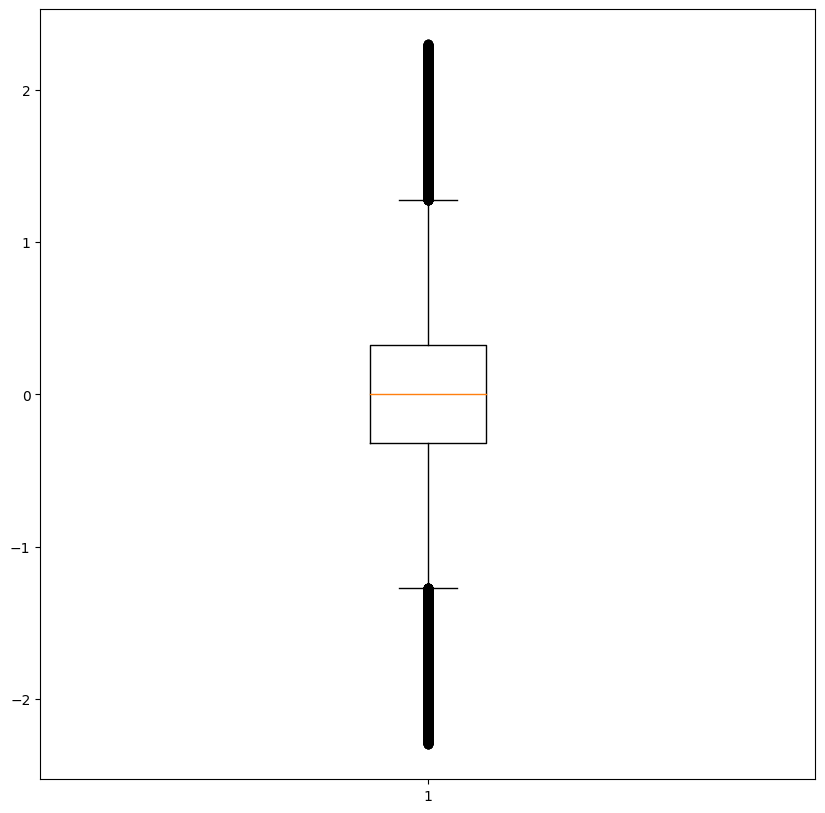

In [55]:
mean = df["y"].mean()
std_deviation = df["y"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["y"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.y.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['y'])

plt.show()

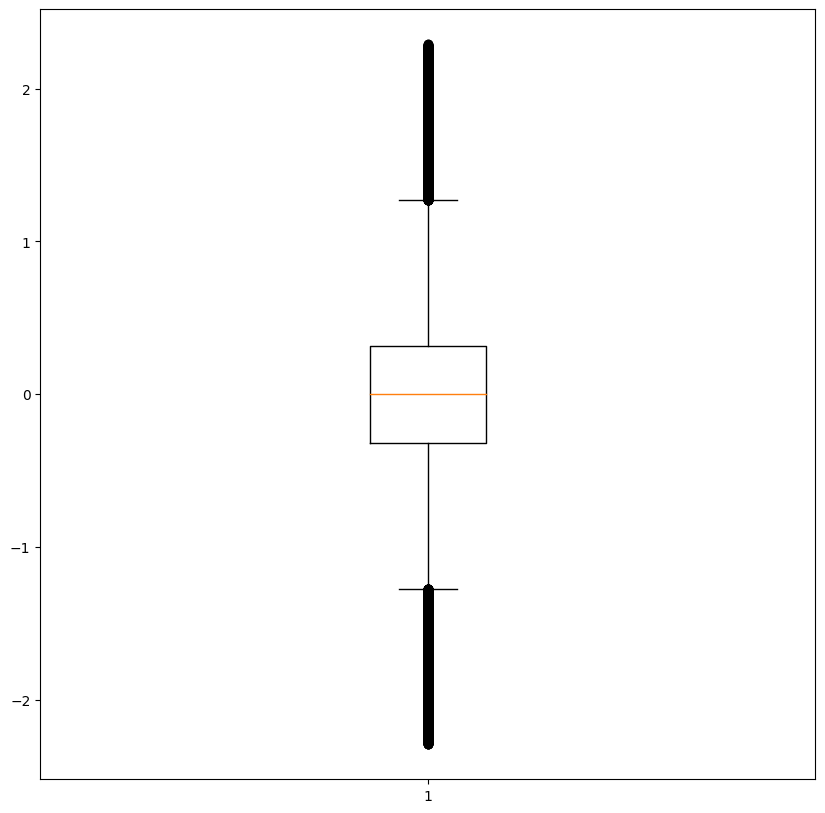

In [56]:
mean = df["z"].mean()
std_deviation = df["z"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["z"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.z.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['z'])

plt.show()

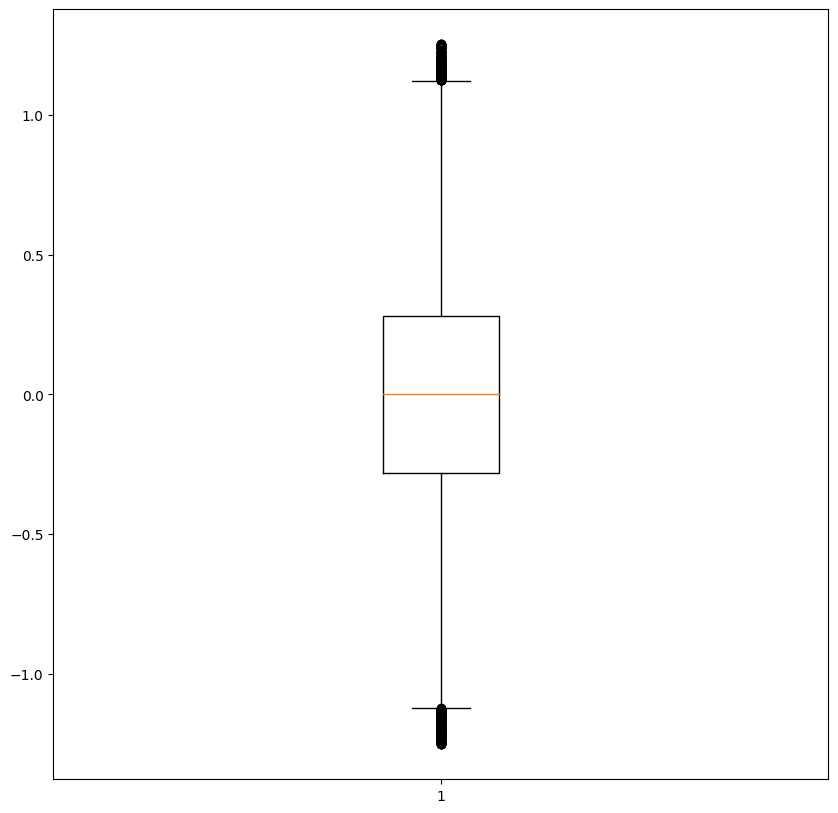

In [57]:
mean = df["vx"].mean()
std_deviation = df["vx"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["vx"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.vx.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['vx'])

plt.show()

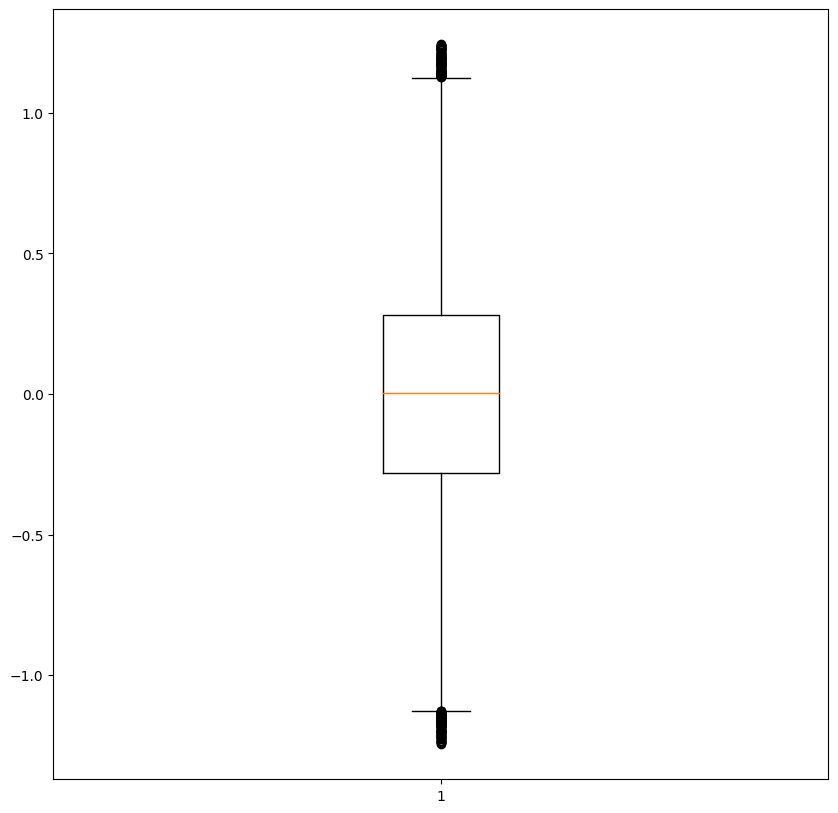

In [58]:
mean = df["vy"].mean()
std_deviation = df["vy"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["vy"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.vy.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['vy'])

plt.show()

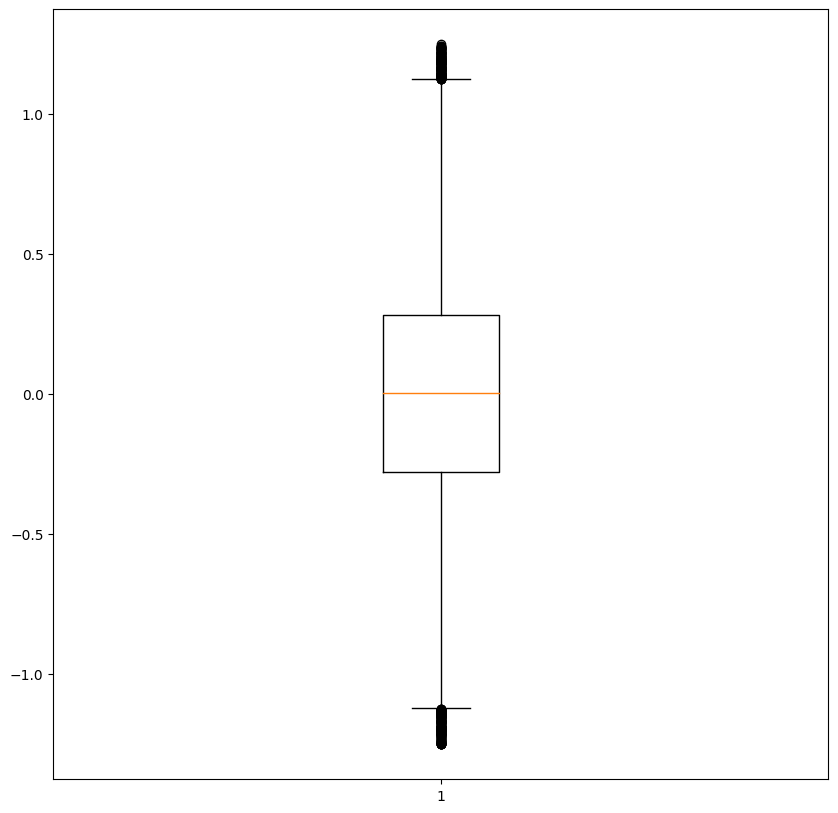

In [59]:
mean = df["vz"].mean()
std_deviation = df["vz"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["vz"] if abs(x - mean) > threshold]
len(outliers)
out = np.asarray(outliers)
df = df[df.vz.isin (out) == False ]
plt.figure(figsize=(10, 10))
plt.boxplot(df['vz'])

plt.show()

In [60]:
mean = df["m"].mean()
std_deviation = df["m"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["m"] if abs(x - mean) > threshold]
len(outliers)

0

In [61]:
df

,x,y,z,vx,vy,vz,m,id
0,-0.043497,0.105297,0.138277,-0.212943,-0.404257,-0.605191,0.000016,8427
1,-0.040714,0.108759,0.136523,0.204248,0.109212,-0.873800,0.000016,44328
2,-0.498487,-1.699947,0.132564,0.262516,-0.324764,0.562522,0.000016,4
3,-0.180061,0.772876,-0.091783,0.031714,0.423959,0.106319,0.000016,38907
4,0.011865,0.426583,0.485580,0.005719,-0.581521,-0.088140,0.000016,6
...,...,...,...,...,...,...,...,...
63992,1.058976,1.956077,-0.386337,-0.118746,-0.553942,-0.208733,0.000016,63996
63993,0.753311,0.004259,0.111236,-0.794958,-0.153329,0.131538,0.000016,63997
63994,0.064444,-0.159256,-0.620617,0.244356,-0.082614,-0.113567,0.000016,63998
63995,0.180758,1.093747,0.601112,-0.379059,-0.388060,0.007006,0.000016,63999


In [62]:
df=df.dropna()
df

,x,y,z,vx,vy,vz,m,id
0,-0.043497,0.105297,0.138277,-0.212943,-0.404257,-0.605191,0.000016,8427
1,-0.040714,0.108759,0.136523,0.204248,0.109212,-0.873800,0.000016,44328
2,-0.498487,-1.699947,0.132564,0.262516,-0.324764,0.562522,0.000016,4
3,-0.180061,0.772876,-0.091783,0.031714,0.423959,0.106319,0.000016,38907
4,0.011865,0.426583,0.485580,0.005719,-0.581521,-0.088140,0.000016,6
...,...,...,...,...,...,...,...,...
63992,1.058976,1.956077,-0.386337,-0.118746,-0.553942,-0.208733,0.000016,63996
63993,0.753311,0.004259,0.111236,-0.794958,-0.153329,0.131538,0.000016,63997
63994,0.064444,-0.159256,-0.620617,0.244356,-0.082614,-0.113567,0.000016,63998
63995,0.180758,1.093747,0.601112,-0.379059,-0.388060,0.007006,0.000016,63999


In [63]:
df_cluster = df.copy()
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60161 entries, 0 to 63996
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       60161 non-null  float64
 1   y       60161 non-null  float64
 2   z       60161 non-null  float64
 3   vx      60161 non-null  float64
 4   vy      60161 non-null  float64
 5   vz      60161 non-null  float64
 6   m       60161 non-null  float64
 7   id      60161 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 4.1 MB


In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here